In [1]:
import os
import sys
import pandas as pd

In [2]:
partition = input("Inserisci la partizione che vuoi utilizzare")
print("Hai inserito la partizione: ", partition)
partition = os.path.join("../partitioning/npy", partition)

foldername = input("Inserisci il nome della cartella dove salvare i risultati")
print("Hai inserito la cartella: ", foldername)

Hai inserito la partizione:  part_100_10
Hai inserito la cartella:  lstm_part_100_10


In [3]:
import tensorflow as tf
print("GPU disponibile:", tf.config.list_physical_devices('GPU'))

2025-03-09 18:08:42.008913: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-03-09 18:08:42.008930: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


GPU disponibile: []


2025-03-09 18:08:42.906460: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2025-03-09 18:08:42.906489: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: paolo-Katana-15-B13VFK
2025-03-09 18:08:42.906495: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: paolo-Katana-15-B13VFK
2025-03-09 18:08:42.906582: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 570.124.6
2025-03-09 18:08:42.906600: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: NOT_FOUND: could not find kernel module information in driver version file contents: "NVRM version: NVIDIA UNIX Open Kernel Module for x86_64  560.35.03  Release Build  (dvs-builder@U16-I1-N07-12-3)  Fri Aug 16 21:42:42 UTC 2024
GCC version:  gcc version 14.2.0 (Ubuntu 14.2.0

In [4]:
sys.path.append("../preprocessing")

In [5]:
import sampling as samp
import normalizzation as norm

In [6]:
sys.path.append("../models")

In [7]:
from lstm_model import LSTMModel

In [8]:
def load_partitions(root_path):
    file_names = ["X_train.csv", "X_test.csv", "X_val.csv", "y_train.csv", "y_test.csv", "y_val.csv"]
    datasets = [pd.read_csv(os.path.join(root_path, file)).values for file in file_names]
    return tuple(datasets)

In [9]:
# load data
X_train, X_test, X_val, y_train, y_test, y_val = load_partitions(partition)

# show partitions dimention
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

X_train shape: (8959, 20), y_train shape: (8959, 1)
X_test shape: (1920, 20), y_test shape: (1920, 1)
X_val shape: (1919, 20), y_val shape: (1919, 1)


In [10]:
# Esempio di input_shape per dati sequenziali: (timesteps=100, features=10)
# input_shape = (50, 1)
window_lag = X_train.shape[1]
input_shape = (window_lag, 1)
print("input_shape: ", input_shape)

# initialize model
lstm_model = LSTMModel(input_shape, foldername)

# show model structure
lstm_model.summary()

input_shape:  (20, 1)


2025-03-09 18:08:43.442209: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 20, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [11]:
# training model
lstm_model.train(X_train, y_train, epochs=100, batch_size=32, validation_data = (X_val, y_val))

Epoch 1/100
277/280 [============================>.] - ETA: 0s - loss: 0.0129 - mae: 0.0862 - root_mean_squared_error: 0.1115
Epoch 1: val_loss improved from inf to 0.00779, saving model to ./tests/lstm_part_100_10/best_model.h5
280/280 [==============================] - 6s 15ms/step - loss: 0.0128 - mae: 0.0861 - root_mean_squared_error: 0.1114 - val_loss: 0.0078 - val_mae: 0.0678 - val_root_mean_squared_error: 0.0873
Epoch 2/100
277/280 [============================>.] - ETA: 0s - loss: 0.0080 - mae: 0.0683 - root_mean_squared_error: 0.0883
Epoch 2: val_loss improved from 0.00779 to 0.00733, saving model to ./tests/lstm_part_100_10/best_model.h5
280/280 [==============================] - 3s 12ms/step - loss: 0.0080 - mae: 0.0683 - root_mean_squared_error: 0.0883 - val_loss: 0.0073 - val_mae: 0.0653 - val_root_mean_squared_error: 0.0846
Epoch 3/100
279/280 [============================>.] - ETA: 0s - loss: 0.0078 - mae: 0.0677 - root_mean_squared_error: 0.0874
Epoch 3: val_loss did no

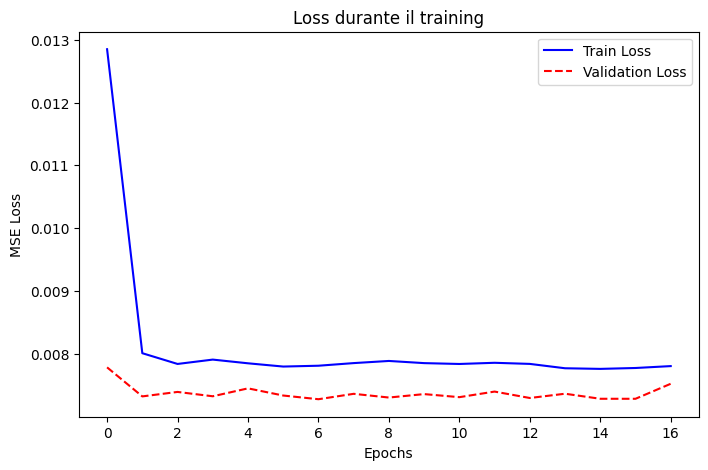

Grafico Loss salvato in ./tests/lstm_part_100_10/loss_plot.png


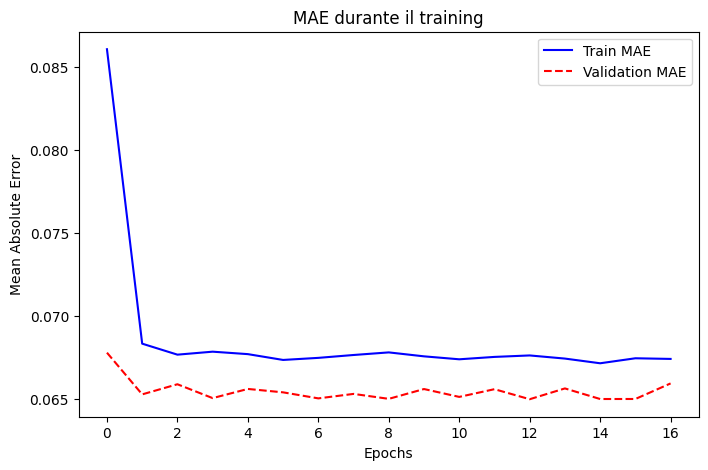

Grafico MAE salvato in ./tests/lstm_part_100_10/mae_plot.png


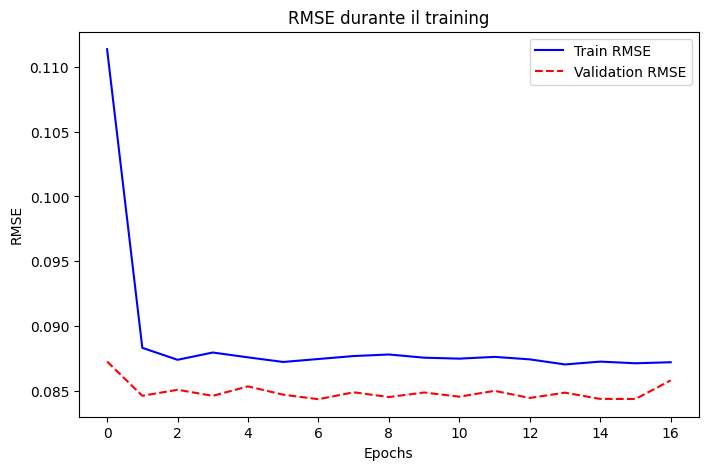

Grafico RMSE salvato in ./tests/lstm_part_100_10/rmse_plot.png


In [12]:
lstm_model.plot_training_history()

In [13]:
lstm_model.evaluate(X_test, y_test)

Metriche salvate in ./tests/lstm_part_100_10/evaluation_metrics.csv


{'MSE': 0.007370794096980955,
 'RMSE': 0.0858533289801913,
 'MAE': 0.06489476847752804,
 'R2': 0.5910584544837414}

In [14]:
y_pred = lstm_model.predict(X_test)  
comparison_df = lstm_model.compare_predictions(y_test, y_pred)  

Confronto predizioni salvato in ./tests/lstm_part_100_10/predictions_comparison.csv


In [15]:
lstm_model.plot_predictions(y_test, y_pred, 50)

Grafico salvato in ./tests/lstm_part_100_10/predictions_plot_1.png
Grafico salvato in ./tests/lstm_part_100_10/predictions_plot_2.png
Grafico salvato in ./tests/lstm_part_100_10/predictions_plot_tot.png


In [16]:
lstm_model.save_model()

Modello salvato in ./tests/lstm_part_100_10/lstm_model.h5


In [17]:
lstm_model.save_summary()

Sommario del modello salvato in ./tests/lstm_part_100_10/model_summary.txt


In [18]:
lstm_model.save_training_history()

Training history salvata in ./tests/lstm_part_100_10/training_history.npy
